San Francisco Poop & Drugs


Data pulling and cleaning -

Let's pull all SF Crime data provided by SF data:

    https://data.sfgov.org/Public-Safety/Map-Crime-Incidents-from-1-Jan-2003/gxxq-x39z
    Incidents are derived from SFPD Crime Incident Reporting system.
    Updated on a daily basis;data available from 1 Jan 2003 up until two weeks from current date (2/28/15)

Let's pull it in and peek at the schema.


In [1]:
# --- Imports ---
import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
from IPython.display import HTML
from IPython.display import Image
%matplotlib inline

/Users/eyi/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


*** Read in data and basic scrubbing ***

In [4]:
# Read

poop=pd.read_csv('/Users/eyi/Dropbox/Projects/DataViz/SFPoop/SF_Human_Waste.csv').fillna('')
print poop.shape
poop.head(1)

(49690, 16)


/Users/eyi/anaconda/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,5107477,9/17/15 22:30,9/18/15 2:40,9/18/15 2:40,Closed,,DPW Ops Queue,Street and Sidewalk Cleaning,Hazardous Materials,Human Waste,Intersection of 17TH ST and DIAMOND ST,8,Castro,"(37.7623546795248, -122.437342388435)",Twitter,http://pic.twitter.com/p0AJL3Kzts


In [30]:
# Add time

poop.index=pd.DatetimeIndex(poop['Opened'])
poop['date']=poop.index.date
poop['year']=poop.index.year
poop['month']=poop.index.month
poop['Month_Year']=poop['date'].apply(lambda x: x.strftime('%Y-%m'))

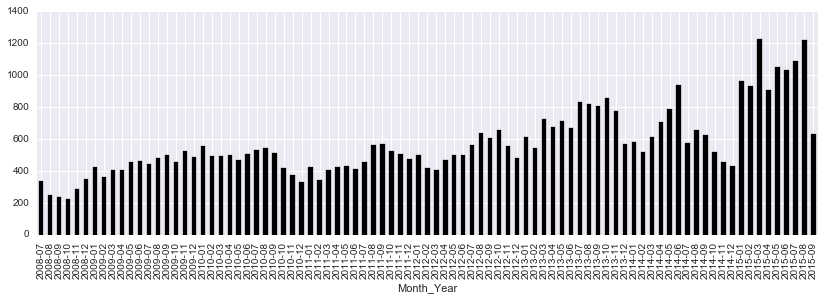

In [31]:
# Aggregate 

ts=poop.groupby('Month_Year').size()
ts.plot(kind='bar',figsize=(14,4),color='k')

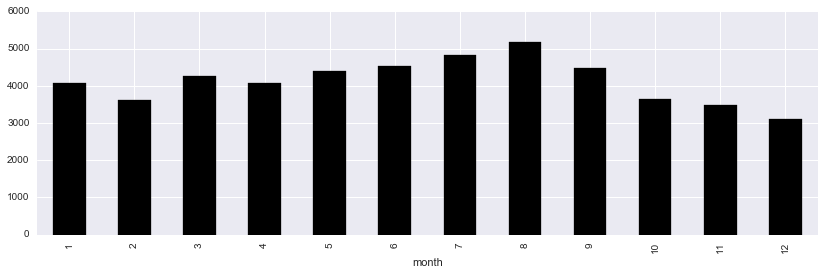

In [32]:
# Monthly aggregate 

ts=poop.groupby('month').size()
ts.plot(kind='bar',figsize=(14,4),color='k')

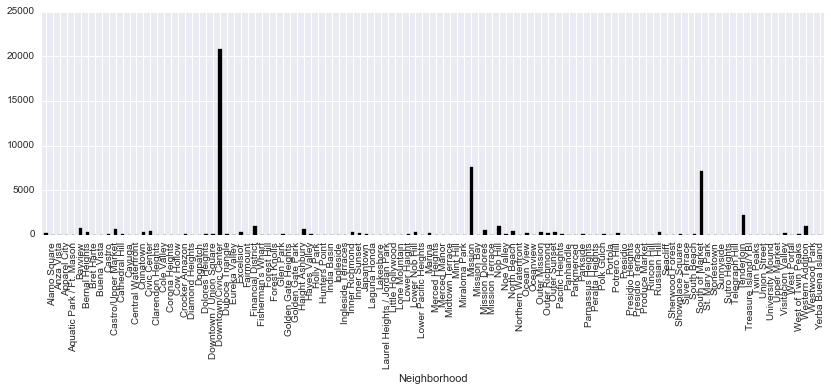

In [33]:
# Hood agg

hood=poop.groupby('Neighborhood').size()
hood.plot(kind='bar',figsize=(14,4),color='k')

*** Now, I want to simplfy and take the top few hoods *** 

In [34]:
# Sum across hoods and take top 6

hood.sort(ascending=False)
top_hoods=hood.index[0:6]

/Users/eyi/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  app.launch_new_instance()


In [35]:
# Hoods

ts_h=poop.groupby(['Month_Year','Neighborhood']).size().unstack().fillna(0)
ts_h=ts_h[top_hoods]
ts_h_n=ts_h.div(ts_h.sum(axis=1),axis=0)

*** What happens in 2015?  *** 


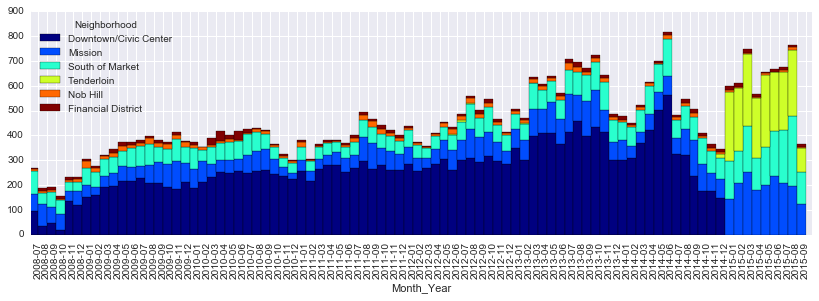

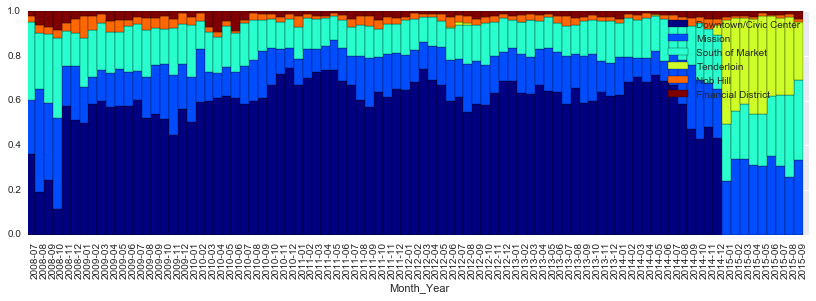

In [36]:
# Plot 

colors = plt.cm.jet(np.linspace(0, 1, len(top_hoods)))
ts_h.plot(figsize=(14,4),kind='bar',stacked=True,width=1,color=colors)
plt.show()

ts_h_n.plot(figsize=(14,4),kind='bar',stacked=True,width=1,color=colors)
plt.legend(loc='upper right')
plt.ylim([0,1])
plt.show()

*** What happened 2014 thru Jun? *** 

*** Same with 2013 thru Jun? *** 

*** Are these reporting issues? *** 

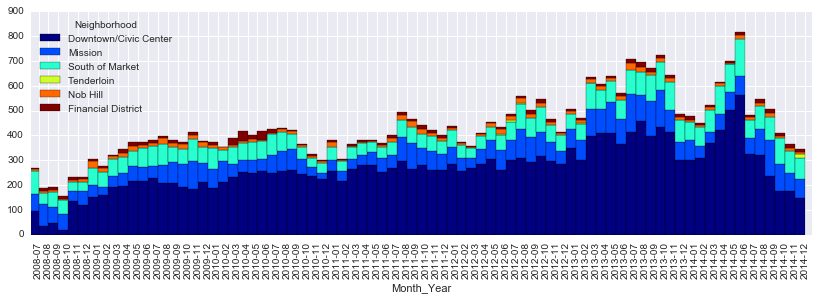

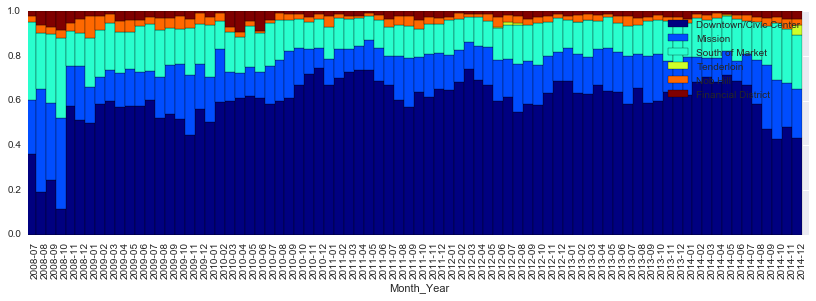

In [37]:
ts_h_pre2015=ts_h.loc[ts_h.index[:78]]
ts_h_n_pre2015=ts_h_n.loc[ts_h_n.index[:78]]

# Plot 
colors = plt.cm.jet(np.linspace(0, 1, len(top_hoods)))
ts_h_pre2015.plot(figsize=(14,4),kind='bar',stacked=True,width=1,color=colors)
plt.show()

ts_h_n_pre2015.plot(figsize=(14,4),kind='bar',stacked=True,width=1,color=colors)
plt.legend(loc='upper right')
plt.ylim([0,1])
plt.show()

*** Request details ***

* Basically all the same

In [38]:
cats=poop.groupby(['Request Details']).size()
cats.sort(ascending=False)
cats

/Users/eyi/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  from ipykernel import kernelapp as app


Request Details
Human_waste_or_urine                                                       37320
Human Waste                                                                 9105
Sidewalk_Cleaning - Human_waste_or_urine                                    2675
Human/Animal Waste - ClearChannel                                            265
Street_Cleaning - Human_waste_or_urine                                       188
Illegal_Dumping - Human_waste_or_urine                                        46
human_services_agency - housing_homeless - complaint                          20
                                                                              10
human_services_agency - hsa_other - complaint                                  9
human_services_agency - housing_homeless - request_for_service                 9
human_services_agency - hsa_other - request_for_service                        5
Human/Animal Waste - USPS                                                      5
human_servic

In [39]:
# If you want to re-categorize
poop.loc[poop['Request Details'].str.contains('Waste'),'Request Details']='Human Poop'
poop.loc[poop['Request Details'].str.contains('waste'),'Request Details']='Human Poop'

# 
poop_clean=poop[poop['Request Details'] == 'Human Poop']

*** Drug crimes ***

In [5]:
all_crime=pd.read_csv('/Users/eyi/Dropbox/Projects/dataviz/SFPoop/Map__Crime_Incidents_-_from_1_Jan_2003.csv.gz', compression='gzip')
print all_crime.shape
drugs_crime=pd.DataFrame(d_crime[d_crime['Category']=='DRUG/NARCOTIC'])
print drugs_crime.shape
d_crime.head(1)

(1048575, 12)


NameError: name 'd_crime' is not defined

In [ ]:
drugs_crime.index=pd.DatetimeIndex(drugs_crime['Date'])
drugs_crime['date']=drugs_crime.index.date
drugs_crime['year']=drugs_crime.index.year
drugs_crime['month']=drugs_crime.index.month
drugs_crime['Month_Year']=drugs_crime['date'].apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
drugs_m_t=drugs_crime.groupby(['Month_Year','Descript']).size().unstack().fillna(0)
drugs_m_t.head(3)

In [ ]:
barbituate_features=['SALE OF BARBITUATES',
                    'POSSESSION OF BARBITUATES FOR SALES',
                    'ENCOURAGE MINOR TO USE BARBITUATES',
                    'POSSESSION OF BARBITUATES']

coke_features=['ENCOURAGING MINOR TO USE COCAINE',
               'SALES COCAINE BASE/SCHOOLYARD TRAFFICKING ACT VIO',
               'TRANSPORTATION OF COCAINE',
               'SALE OF COCAINE',
               'POSSESSION OF COCAINE FOR SALES',
               'POSSESSION OF COCAINE']

weed_features=['ENCOURAGING MINOR TO USE MARIJUANA',
               'FURNISHING MARIJUANA',
               'PLANTING/CULTIVATING MARIJUANA',
               'TRANSPORTATION OF MARIJUANA',
               'SALE OF MARIJUANA',
               'POSSESSION OF MARIJUANA FOR SALES',
               'POSSESSION OF MARIJUANA']

methadone_features=['TRANSPORTATION OF METHADONE',
                   'SALE OF METHADONE',
                   'POSSESSION OF METHADONE FOR SALES',
                   'POSSESSION OF METHADONE']

hallu_features=['TRANSPORTATION OF OPIATES',
                'SALE OF HALLUCINOGENIC',
                'POSSESSION OF OPIUM',
                'POSSESSION OF OPIUM DERIVATIVE',
                'POSSESSION OF OPIUM',
                'SALE OF OPIUM',
                'SALE OF OPIUM DERIVATIVE',
                'TRANSPORTATION OF OPIATES',
                'POSSESSION OF OPIUM FOR SALES',
                'TRANSPORTATION OF HALLUCINOGENIC',
                'POSSESSION OF OPIUM DERIVATIVE FOR SALES',
                'SALE OF OPIATES',
                'SALE OF HALLUCINOGENIC',
                'POSSESSION OF OPIUM DERIVATIVE',
                'POSSESSION OF OPIUM',
                'POSSESSION OF OPIATES FOR SALES',
                'POSSESSION OF HALLUCINOGENIC FOR SALES',
                'POSSESSION OF OPIATES',
                'POSSESSION OF HALLUCINOGENIC']

meth_features=['TRANSPORTATION OF AMPHETAMINE',
               'SALE OF AMPHETAMINE',
               'POSSESSION OF AMPHETAMINE',
               'SALE OF METH-AMPHETAMINE',
               'TRANSPORTATION OF METH-AMPHETAMINE',
               'POSSESSION OF AMPHETAMINE FOR SALES',
               'POSSESSION OF METH-AMPHETAMINE FOR SALE',
               'POSSESSION OF METH-AMPHETAMINE']

heroin_features=['SALE OF HEROIN',
                 'POSSESSION OF HEROIN',
                 'POSSESSION OF HEROIN FOR SALES',
                 'TRANSPORTATION OF HEROIN',
                 'SALE OF HEROIN',
                 'POSSESSION OF HEROIN FOR SALES',
                 'POSSESSION OF HEROIN']

crack_features=['POSSESSION OF BASE/ROCK COCAINE FOR SALE',
                'SALE OF BASE/ROCK COCAINE',
                'POSSESSION OF BASE/ROCK COCAINE']

In [ ]:
def drug_analysis(t):
    t['BARBITUATES']=t[map(lambda s: s.strip(), barbituate_features)].sum(axis=1)
    t['HEROIN']=t[map(lambda s: s.strip(), heroin_features)].sum(axis=1)
    t['HALLUCINOGENIC']=t[map(lambda s: s.strip(), hallu_features)].sum(axis=1)
    t['METH']=t[map(lambda s: s.strip(), meth_features)].sum(axis=1)
    t['WEED']=t[map(lambda s: s.strip(), weed_features)].sum(axis=1)
    t['COKE']=t[map(lambda s: s.strip(), coke_features)].sum(axis=1)
    t['METHADONE']=t[map(lambda s: s.strip(), methadone_features)].sum(axis=1)
    t['CRACK']=t[map(lambda s: s.strip(), crack_features)].sum(axis=1)
    drugs=t[['BARBITUATES','HEROIN','HALLUCINOGENIC','METH','WEED','COKE','CRACK']]
    return drugs

# Take sum of drug data across categroies
drugs_m_t_agg=drug_analysis(drugs_m_t)
# Take to 2015
drugs_m_t_agg=drugs_m_t_agg.loc[drugs_m_t_agg.index[:-2]]
# Add Poop (works b/c index of dfs are the same)
drugs_m_t_agg['Poop']=ts_h_pre2015_all_poop=ts_h_pre2015.sum(axis=1)
drugs_m_t_agg.dropna(inplace=True)

In [ ]:
drugs_m_t_agg.head(3)

In [ ]:
drugs_m_t_agg.head(3)

In [ ]:
colors = plt.cm.jet(np.linspace(0, 1, len(drugs_m_t_agg.columns)))
drugs_m_t_agg.plot(figsize=(14,4),kind='bar',stacked=True,width=1,color=colors)
plt.show()

In [ ]:
colors = plt.cm.jet(np.linspace(0, 1, len(drugs_m_t_agg.columns)))
drugs_m_t_agg.plot(figsize=(14,4),style='--o',color=colors)
plt.show()

In [ ]:
sns.corrplot(drugs_m_t_agg, annot=False, sig_stars=False,diag_names=False)

In [ ]:
drugs_m_t_agg[['CRACK','Poop']].plot(figsize=(14,4),style='--o')

In [ ]:
drugs_m_t_agg[['HEROIN','Poop']].plot(figsize=(14,4),style='--o')

In [ ]:
drugs_m_t_agg[['METH','Poop']].plot(figsize=(14,4),style='--o')

So with so much poop data and so little drug data, we want to use the Pearson or the Spearman correlation methods to determine the most accurate level of correlation. 

In [ ]:
#Let's try the Pearson first.

from scipy.stats.stats import pearsonr
pearsonr(drugs_m_t_agg['METH'], drugs_m_t_agg['Poop'])